# Stock Market Prediction with Reddit Sentiment Analysis

## Topic
The purpose of this project is to build up a model to predict the short-term up and down trend of stock market by the machine learning approach and the sentiment analysis.

**Motivation**:<br>
The sentiment analysis function of Bloomberg terminal plays an important role in the prediction of GameStop Corporation (GME) ‘s stock price in February this year, which has shown the power and potential of this AI application in the investment area.
The application of machine learning combined with semantic analysis could be a trend in the coming future.

## Description about dataset
The datasets used in this project contains a training set and two testing sets, including the open-sourced dataset "CombinedNewsDJIA.csv" containing historical news headlines from from Reddit WorldNews Channel (/r/worldnews) and sentiment labels published by @Aaron7sun in Kaggle, the latest Reddit World News news headline dataset collected recently, and the dataset classified by TextBlob which is a Python library for processing textual data.

CombinedNewsDJIA.csv:<br>
This dataset is conbined with 27 columns. The first column is "Date", the second is "Label", and the following ones are news headlines ranging from "Top1" to "Top25".

daily headlines_updated.csv:<br>
It's created automatedly in the program through the Reddit API.

### Workflow

1.Import the Libraries

2.Prepare the Training Set(Text feature extraction: parameters)

3.Prepare the Testing Set

4.Fit the Model and Make Predictions

4.1 Logistic Regression

- 4.1.1 Ridge Regression

- 4.1.1.1 Model Evaluation

- 4.1.1.2 Visualization

- 4.1.2.3 Testing the Model 1 (Logistic Regression)

4.2 Random Forest

- 4.2.1 Ridge Random Forest

- 4.2.1.1 Model Evaluation

- 4.2.1.2 Visualization
    
- 4.2.1.3 Testing the Model 2 (Random Forest)

4.3 TextBlob（Based on Random Forest）

- 4.3.1 Model Evaluation

- 4.3.2 Visualization

- 4.3.3 Testing the Model 3 (TextBlob)

# Step 1: Import the Libraries

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import requests
import praw

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime, timedelta
import pytz

# Step 2: Prepare the Training Set

In [3]:
# Load the training dataset
data = pd.read_csv("Combined_News_DJIA.csv")
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
# Merge daily headlines for training set
headlines_train = []
for ind, row in data.iterrows():
    headlines_train.append(" ".join(str(x) for x in row[2:]))

## Text feature extraction: parameters

In [5]:
# Extract features from training set headlines
vectorizer = TfidfVectorizer(min_df=0.03, max_features=100000, ngram_range=(2,2))
# Get X_train and y_train
X_train = vectorizer.fit_transform(headlines_train)
# Get y_train
y_train = data['Label']

# Step 3: Prepare the Test Set

In [6]:
import datetime as dt

In [7]:
reddit = praw.Reddit(
    client_id="bOuI3ljZ3uXBCQ",
    client_secret="pa8dxqESlAjVRzdWoxwaDrNxpA9THg",
    password="Liwangcai123",
    user_agent="MyBot",
    username="Liwangcai",
)

Version 7.2.0 of praw is outdated. Version 7.3.0 was released 5 days ago.


In [8]:
print(reddit.user.me())

Liwangcai


In [9]:
# Create test set headlines
def get_reddit_news_month():
    # New York timezone
    ny = pytz.timezone("America/New_York")
    
    # Establish Reddit API connection
    reddit = praw.Reddit(client_id="bOuI3ljZ3uXBCQ",
                     client_secret="pa8dxqESlAjVRzdWoxwaDrNxpA9THg",
                     user_agent="MyBot",
                     username="Liwangcai",
                     password="Liwangcai123")
    
    # Get top daily headlines for last month
    # Convert dates to NY time    
    subreddit = reddit.subreddit("worldnews")
    headlines = []
    headline_dates = []
    for submission in subreddit.top("month", limit=500):
        headlines.append(submission.title)
        headline_dates.append(datetime.fromtimestamp(int(
submission.created_utc)).astimezone(ny).date())
    
    # Store in dataframe
    month_news = pd.DataFrame(columns={"Date", "Headline"})
    month_news["Date"] = headline_dates
    month_news["Headline"] = headlines
    month_news.sort_values("Date", inplace=True)
    
    # Merge daily headlines into single string for each date
    # Limit to 25 headlines per date
    headlines = [month_news.iloc[0]["Headline"]]
    count = 0
    for i in range(1, len(month_news)):
        if month_news.iloc[i]["Date"] == month_news.iloc[i- 
1]["Date"]:
            count += 1
            if count <= 25:
                headlines[-1] = headlines[-1] + " " + month_news.iloc[i]["Headline"]
        else:
            headlines.append(month_news.iloc[i]["Headline"])
            count = 0
            
    # Get unique headline dates
    unique_dates = []
    for date in sorted(headline_dates):
        if date not in unique_dates:
            unique_dates.append(date)
            
    return headlines, unique_dates, month_news
headlines_test, unique_dates, news_test = get_reddit_news_month()
news_test

,Headline,Date
287,CBC Journalists Told They Can’t Cover Israel-P...,2021-05-22
244,Pentagon chief unable to talk to Chinese milit...,2021-05-22
273,Croatia: Court ruling paves way for same-sex c...,2021-05-22
278,Climbing guide reports large COVID-19 outbreak...,2021-05-22
226,"India tells social media firms to remove ""Indi...",2021-05-22
...,...,...
186,New oilfield in African wilderness threatens l...,2021-06-20
389,Cuba encouraged by early efficacy results of h...,2021-06-20
214,"More than 100 celebrities, prominent Canadians...",2021-06-20
446,JAXA: Soil from asteroid shows it has ingredie...,2021-06-20


In [12]:
news_test.to_csv("daily headlines_updated.csv")

In [13]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


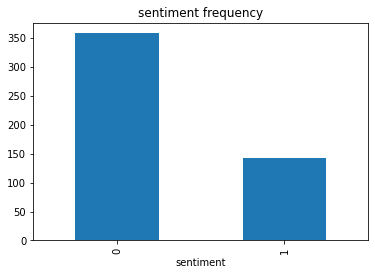

In [16]:
# Positive/neutrality return 1, negative return 0
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
df  = pd.read_csv('daily headlines_updated.csv')
df['Headline'] = df['Headline'].replace(np.nan,  "")
df['score_Textblob'] = df['Headline'].map(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment"] = (df['score_Textblob'] > 0) * 1
df.groupby("sentiment")['Date'].count().plot(kind = 'bar', title ="sentiment frequency")
plt.show()

writer = pd.ExcelWriter('reddit_news_sentiment_updated.xlsx',engine='xlsxwriter',options={'strings_to_urls': False})
df.to_excel(writer, index = None)
writer.save()

In [17]:
# Get Dow Jones daily returns for last month
ticker = "^DJI"
# Create time filter
today = datetime.today().strftime("%d/%m/%Y")
today = datetime.strptime(today + " +0000", "%d/%m/%Y %z")
thirty_days_ago = today-timedelta(days=30)
to = int(today.timestamp())
fro = int(thirty_days_ago.timestamp())
# Put stock price data in dataframe
url = "https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={fro}&period2={to}&interval=1d&events=history".format(ticker=ticker, fro=fro, to=to)
dj = pd.read_csv(url)
# Convert date to timestamp and make index
dj.index = dj["Date"].apply(lambda x: pd.Timestamp(x))
dj.drop("Date", axis=1, inplace=True)

In [18]:
# Calculate returns
dj["Returns"] = dj["Adj Close"]/dj["Adj Close"].shift(1) - 1
dj.dropna(inplace=True)

In [19]:
# Get X_test and y_test
# Positive/zero return: y = 1, negative return: y = 0
X_test = []        
y_test = []
for j in range(len(unique_dates)):
    for i in range(1, len(dj)):
        if dj.index[i-1] == unique_dates[j]:
            ret = dj.iloc[i]["Returns"]
            if ret >= 0:
                y_test.append(1)
            else:
                y_test.append(0)
            X_test.append(headlines_test[j])

X_test_text = X_test.copy()            
X_test = vectorizer.transform(X_test)

# Step 4: Fit the Model and Make Predictions

## Model 1: logistic regression

### Lasso regression

In [20]:
# Fit logistic regression model
model = LogisticRegression(solver="saga", penalty="l2")
model = model.fit(X_train, y_train)
# Get test predictions
y_pred = model.predict(X_test)

In [21]:
acc = accuracy_score(y_test, y_pred)
print('Logic Regression accuracy: ', acc)
confusion_matrix(y_test, y_pred)

Logic Regression accuracy:  0.4444444444444444


array([[1, 8],
       [2, 7]])

### Ridge regression

In [22]:
# Fit logistic regression model
model = LogisticRegression(solver="saga", penalty="l1")
model = model.fit(X_train, y_train)
# Get test predictions
y_pred = model.predict(X_test)

In [23]:
acc = accuracy_score(y_test, y_pred)
print('Logic Regression accuracy: ', acc)
confusion_matrix(y_test, y_pred)
print("confusion matrix:\n {}".format(confusion_matrix(y_test, y_pred)))

Logic Regression accuracy:  0.3888888888888889
confusion matrix:
 [[1 8]
 [3 6]]


#### Model evaluation using improvement matrix

In [24]:
# import the metrics class
from sklearn import metrics
con_matrix = metrics.confusion_matrix(y_test, y_pred)
con_matrix

array([[1, 8],
       [3, 6]])

#### Visualization

In [25]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

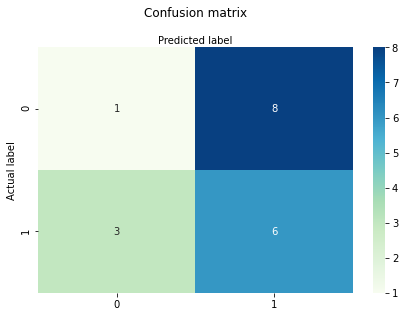

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="GnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Testing the model 1 (Logistic Regression)

In [27]:
from sklearn import metrics
print('Accuracy score is :', metrics.accuracy_score(y_test, y_pred))
print('Precision score is :', metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall score is :', metrics.recall_score(y_test, y_pred, average='weighted'))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred))

Accuracy score is : 0.3888888888888889
Precision score is : 0.33928571428571425
Recall score is : 0.3888888888888889
		Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.43      0.67      0.52         9

    accuracy                           0.39        18
   macro avg       0.34      0.39      0.34        18
weighted avg       0.34      0.39      0.34        18



## Model 2: Random Forest

In [28]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

In [29]:
print("Random Forest\n")
print("confusion matrix:\n {}".format(confusion_matrix(y_test, Y_pred)))
print("\n\naccuracy: {}".format(accuracy_score(y_test, Y_pred)))

Random Forest

confusion matrix:
 [[1 8]
 [2 7]]


accuracy: 0.4444444444444444


### Ridge Random Forest

In [30]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

In [31]:
print("Random Forest\n")
print("confusion matrix:\n {}".format(confusion_matrix(y_test, Y_pred)))
print("\n\naccuracy: {}".format(accuracy_score(y_test, Y_pred)))

Random Forest

confusion matrix:
 [[1 8]
 [1 8]]


accuracy: 0.5


#### Model evaluation using improvement matrix

In [32]:
# import the metrics class
from sklearn import metrics
cof_matrix = metrics.confusion_matrix(y_test, Y_pred)
cof_matrix

array([[1, 8],
       [1, 8]])

#### Visualization

In [33]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

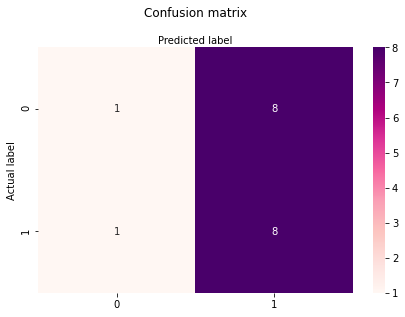

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cof_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Testing the model 2 (Random Forest)

In [35]:
from sklearn import metrics
print('Accuracy score is :', metrics.accuracy_score(y_test, Y_pred))
print('Precision score is :', metrics.precision_score(y_test, Y_pred, average='weighted'))
print('Recall score is :', metrics.recall_score(y_test, Y_pred, average='weighted'))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, Y_pred))

Accuracy score is : 0.5
Precision score is : 0.5
Recall score is : 0.5
		Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.50      0.89      0.64         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.41        18
weighted avg       0.50      0.50      0.41        18



## Model 3: TextBlob（Based on Random Forest）

In [36]:
bolb_pred = [(TextBlob(x).sentiment.polarity >= 0) * 1for x in X_test_text]
print("Random Forest\n")
print("confusion matrix:\n {}".format(confusion_matrix(y_test, bolb_pred)))
print("\n\naccuracy: {}".format(accuracy_score(y_test, bolb_pred)))

Random Forest

confusion matrix:
 [[3 6]
 [1 8]]


accuracy: 0.6111111111111112


#### Model evaluation using improvement matrix

In [37]:
# import the metrics class
from sklearn import metrics
cop_matrix = metrics.confusion_matrix(y_test, bolb_pred)
cop_matrix

array([[3, 6],
       [1, 8]])

#### Visualization

In [38]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

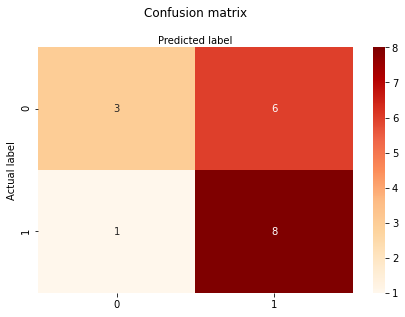

In [39]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cop_matrix), annot=True, cmap="OrRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Testing the model 3 (TextBlob)

In [40]:
from sklearn import metrics
print('Accuracy score is :', metrics.accuracy_score(y_test, bolb_pred))
print('Precision score is :', metrics.precision_score(y_test, bolb_pred, average='weighted'))
print('Recall score is :', metrics.recall_score(y_test, bolb_pred, average='weighted'))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, bolb_pred))

Accuracy score is : 0.6111111111111112
Precision score is : 0.6607142857142857
Recall score is : 0.6111111111111112
		Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.57      0.89      0.70         9

    accuracy                           0.61        18
   macro avg       0.66      0.61      0.58        18
weighted avg       0.66      0.61      0.58        18



__________________________________________________________________________________________________________________________________

Originally, this project is developed for my gourp project in the course AIDM7370 @HKBU. I'm glad and grateful to work with my classmates ZENG Yi, JIANG Heshui and LYU Honglin to complete this practical work.